In [1]:
import pandas as pd
import gpu_tracking as gt
import tifffile
data = tifffile.imread("0 (1).tif").astype("float32")
import matplotlib.pyplot as plt
vid1 = data[:, 0, :, :].copy()
vid2 = data[:, 1, :, :].copy()

In [2]:
from skimage.feature.blob import _compute_disk_overlap
import math
import numpy as np
def my_disk(d, r1, r2):
    ratio1 = (d ** 2 + r1 ** 2 - r2 ** 2) / (2 * d * r1)
    ratio1 = np.clip(ratio1, -1, 1)
    acos1 = math.acos(ratio1)

    ratio2 = (d ** 2 + r2 ** 2 - r1 ** 2) / (2 * d * r2)
    ratio2 = np.clip(ratio2, -1, 1)
    acos2 = math.acos(ratio2)

    a = -d + r2 + r1
    b = d - r2 + r1
    c = d + r2 - r1
    d = d + r2 + r1
    area = (r1 ** 2 * acos1 + r2 ** 2 * acos2 -
            0.5 * math.sqrt(abs(a * b * c * d)))
    print(f"{ratio1 = }")
    print(f"{acos1 = }")
    print(f"{ratio2 = }")
    print(f"{acos2 = }")
    print(f"{a = }")
    print(f"{b = }")
    print(f"{c = }")
    print(f"{d = }")
    print(f"{area = }")
    return area / (math.pi * (min(r1, r2) ** 2))

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

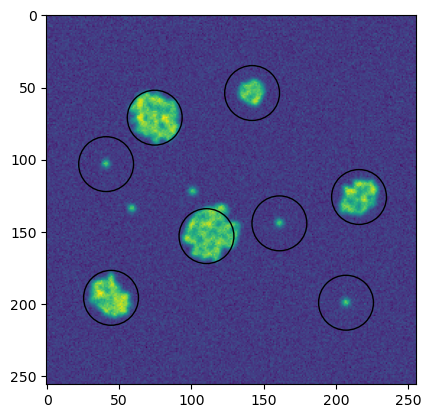

In [6]:
vid = vid1 + vid2
d = 38
df = gt.batch(vid, d, snr = 1.5)
gt.annotate_video(vid, df, r = d/2)

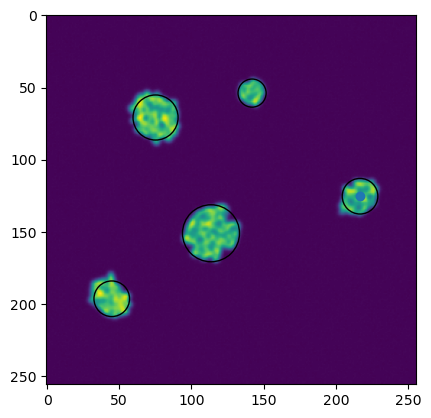

In [3]:
vid = vid2
df = gt.LoG(vid, min_r = 3, max_r = 25, snr = 1.5, log_spacing = True, overlap_threshold = 0.0, search_range = 9)
gt.annotate_video(vid, df, frame = 0)
plt.plot(216.774567, 125.241486, 'o')
# plt.plot(207.493317, 132.784637, 'o')

In [17]:
df[(df["x"] > 200) & (df["x"] < 220) & (df["y"] > 125) & (df["y"] < 150) & (df["frame"] == 0)]

,frame,y,x,mass,r,particle
12,0,134.689072,218.863510,2788.271484,3.000000,12
30,0,132.784637,207.493317,8241.832031,4.805601,30
34,0,125.241486,216.774567,53471.546875,12.331064,34


(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

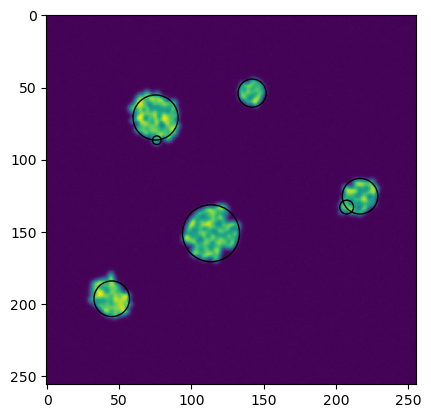

In [9]:
vid = vid2
df = gt.LoG(vid, min_r = 3, max_r = 25, snr = 1.5, log_spacing = True, overlap_threshold = 0.51)
gt.annotate_video(vid, df, frame = 0)

In [6]:
(df["frame"] == 0).sum()

12

In [7]:
df

,frame,y,x,mass,r
0,0,151.038345,113.420265,93733.210938,19.752718
1,0,70.718475,75.155838,81012.484375,15.606794
2,0,196.310760,44.804173,62017.949219,12.331064
3,0,125.224213,216.785538,53503.023438,12.331064
4,0,53.813717,142.030930,33987.574219,9.742880
...,...,...,...,...,...
525,35,109.998802,34.037457,3465.532959,3.796946
526,35,142.044388,49.034939,3388.556152,3.796946
527,35,219.978897,201.985443,3335.425049,3.796946
528,35,184.236511,24.564325,1744.156128,3.000000
